# **An introduction to Functional Programming**
---
<img src="http://www.doc.ic.ac.uk/~afd/images/logo_imperial_college_london.png" align = "left" width=200>
 <br><br><br><br>
 
- Copyright (c) Antoine Jacquier, 2021. All rights reserved

- Author: Antoine Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.7

In [1]:
import numpy as np
import matplotlib.pylab as plt
plt.style.use('dark_background')
from PIL import Image
import matplotlib.pyplot as plt

Imperative Programming is "traditional programming", that is the style of programming used in C, C++, Java, C#...
There, the programmer tells the computer what to do, and the structure is dictated by control statements, looping constructs and assignments. Functional Programming however, aims to describe the solution of the program, rather than the way it should be done.

FP is also easier to debug, as each function can be thought as an independent debug unit.

Source: , https://www.jobsity.com/blog/5-programming-paradigms-you-should-know-about


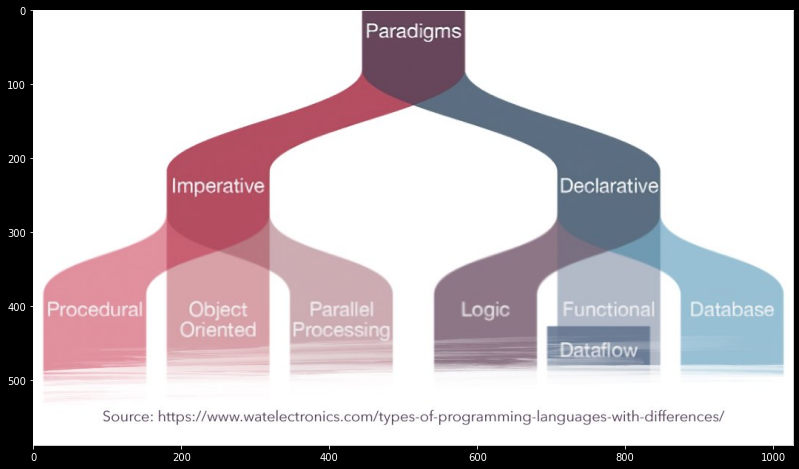

In [2]:
img = Image.open(r"Paradigms.jpeg")  
plt.figure(figsize=(16, 8))
plt.imshow(img)
print("Source: , https://www.jobsity.com/blog/5-programming-paradigms-you-should-know-about")

# Introduction: Characterisation of Python functions

## Referentially Transparency

An operation is said to be Referentially Transparent (RT) if it can be replaced with its
corresponding value, without changing the program's behaviour, for a given set of
parameters. The function `incrementRT` below is RT as it always returns the same values for the same input:

In [3]:
def incrementRT(num):
    return num + 1

print("Output: ", incrementRT(5))
print("Output: ", incrementRT(5))

Output:  6
Output:  6


The following function, `incrementNotRT`, however, is not, as the output changes because of the global variable:

In [4]:
amount = 1
def incrementNotRT(num):
    return num + amount

print("Output: ", incrementNotRT(5))
amount = 2
print("Output: ", incrementNotRT(5))

Output:  6
Output:  7


A function that returns the current time is clearly not Referentially Transparent.

### Side effects

A function should not have any side effects, i.e. should  base its operations purely on the values it receives and its only impact should be the result returned. Any hidden side effects make software harder to maintain. Many functions, however, do have side effects, for example when it updates a database.
We call a function **PURE** if it does not have side effects.

#### Immutability

Python offers immutable data types, in particular "Tuple", to be contrasted with standard lists.

In [5]:
mutable = ['Jack', 10, [4, 5]]
immutable = ('Jack', 10, [4, 5])

# Reading from data types are essentially the same:
print("mutable is of type ", type(mutable), mutable[2])    # [4, 5]
print("immutable is of type ", type(immutable), immutable[2])  # [4, 5]

mutable is of type  <class 'list'> [4, 5]
immutable is of type  <class 'tuple'> [4, 5]


In [8]:
# Tuple items cannot be modified
mutable[1] = 15

In [9]:
immutable[2] = [4, 5, 3]

TypeError: 'tuple' object does not support item assignment

In [12]:
### Note that immutable[2] is a List, and not a Tuple, and therefore can be modified, for example:
print(type(immutable[2]))
immutable[2].append(3)
print(immutable)

<class 'list'>
('Jack', 10, [4, 5, 3, 3])


**Exercise**

Suppose you are a bank, and you need to construct a database for all the accounts. How would you write (as a list or a tuple) it, given that an account has the following attributes (for each attribute, indicate its type):
- Bank account number
- Bank account holder's name
- Transactions (with the corresponding date)


# Higher-order functions

A higher-order function is a function that takes other functions (or actions) as arguments. One may think of it as a convolution function.

In [14]:
def hof_write_repeat(message, n, action):
    for i in range(n):
        action(message)

In [15]:
hof_write_repeat('Hello', 3, print)

Hello
Hello
Hello


In [16]:
import logging
## Logging allows you to track events occurring when something is running
# Log the output as an error instead
hof_write_repeat('Hello', 3, logging.error)

ERROR:root:Hello
ERROR:root:Hello
ERROR:root:Hello


In [17]:
logging.error

<function logging.error(msg, *args, **kwargs)>

In [18]:
def hof_add(increment):
    # Create a function that loops and adds the increment
    def add_increment(listOfNumbers):
        return [l + increment for l in listOfNumbers]
    return add_increment

In [19]:
add5 = hof_add(5)

print("add5 has type ", type(add5))
print(add5([23, 88]))

add10 = hof_add(10)
print(add10([23, 88]))

add5 has type  <class 'function'>
[28, 93]
[33, 98]


# lambda functions 

A `lambda` function is an anonymous function. 
They act like standard functions, but are created withouth the `def` keyword and without a name.
Their key attributes are 

- they can take any number of arguments;
- they can return function objects;
- they only contain one single expression.


*Classical definition of a function*

In [20]:
def prod(x,y):
    return x*y

*Its `lambda` version*

In [21]:
product = lambda x, y : x * y
product(2, 3)

6

We can write a multiplication table, similarly to above, using lambda functions:

In [22]:
def hof_product(multiplier):
    return lambda x: x * multiplier

multTable = hof_product(2)
[multTable(i) for i in range(10)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

We can as usual apply the function directly to many values at the same time

In [25]:
multTable(arange(10))

NameError: name 'arange' is not defined

**WARNING: READABILITY, CLARITY, SIMPLICITY**

**Exercise**

Rewrite the higher-order function `hof_add` above using `lambda` functions

# Built-in higher-order functions

Python has several higher-order functions already built in. Note that they always return an iterator.

## The `map` function

It allows us to apply a function to every element in an iterable object.

In [42]:
names = ['George', 'Yuvraj', 'Benjamin', 'Thomas', 'Mario', 'Shikang', 'Konstantinos', 'Yufan']

greetingPhrase = "Hello"
[greetingPhrase + " "  + n for n in names]


['Hello George',
 'Hello Yuvraj',
 'Hello Benjamin',
 'Hello Thomas',
 'Hello Mario',
 'Hello Shikang',
 'Hello Konstantinos',
 'Hello Yufan']

In [43]:
greeted_names = map(lambda x: greetingPhrase + " " + x, names)

print(greeted_names)

How to retrieve elements from there?

Tuples, as presented above, are also iterable, so `map` can be applied to them as well:

In [44]:
namesTuple = tuple(names)
greeted_names_tuple = map(lambda x: greetingPhrase + " " + x, namesTuple)

for sentence in greeted_names_tuple:
    print(sentence)

Hello George
Hello Yuvraj
Hello Benjamin
Hello Thomas
Hello Mario
Hello Shikang
Hello Konstantinos
Hello Yufan


**Exercise**

Rewrite the multiplication table above using `map` and `lambda` functions.

## The `filter` function.

 It tests every element in an iterable object with a function that returns True or False, keeping the former only.

In [49]:
numbers = [13, 10, 11, 17, 85]

div_by_5 = filter(lambda num: num % 5 == 0, numbers)
div_by_5_map = map(lambda num: num % 5 == 0, numbers)

In [52]:
for d in div_by_5_map:
    print(d)

Note that `div_by_5_map` is an iterator, meaning that after having gone through it, it returns an empty result

Note that you  can convert the iterator into a `list`

In [54]:
print(list(div_by_5))

[]


**Question:** What would be the output of above cell if we were to replace `filter` by `map`?

**Exercise

Rewrite the `div_vy_5` function using `map`

## `functools` functions

### `reduce`

reduces the iterable to a single value. Contrary to `filter` and `map`, it takes two input values.

In [55]:
import functools 
  
myList = range(10)
  
mySum = functools.reduce(lambda a,b : a+b, myList)
print("The sum is equal to", mySum) 
  
myMax = functools.reduce(lambda a,b : a if a > b else b,myList)
print("The maximum is equal to", myMax) 

The sum is equal to 45
The maximum is equal to 9


Quote by Guido van Rossum (creator of `Python`):
"*Use functools.reduce if you really need it; however, 99% of the time an explicit for loop is more readable.*"

### The `partial` module

One may want to use the behaviour of a function, but freezing some of its arguments.
For example

In [58]:
from functools import partial

def add(b, a):
    return a + np.sum(b)

In [59]:
add([1, 2, 3], 5)

11

In [60]:
add_new = partial(add, [2, 3, 5, 7])
add_new

print(add_new(4))

21


*Example: When using the Black-Scholes pricing function, we may want to impose a specified interest rate, that the user cannot modify.* 

$$
BS(r, S_0, K, T, \sigma)
$$

BS_user = partial(BS, fixedRate)

**Exercise**

Rewrite the above two operations (sum and max) using `numpy` packages (not with `functools`)

**Exercise

Write the following command using `map` and `filter`:

`arbitrary_numbers = [num ** 3 for num in range(1, 21) if num % 3 == 0]`

Test on the list `numbers = [13, 10, 11, 18, 35]`

In [61]:
## Solution:
arbitrary_numbersFilter = map(lambda num: num ** 3, filter(lambda num: num % 3 == 0, range(1, 21)))

# Iterators and Generators

An iterator is an object representing a stream of data. It must support a method called `__next__()` that takes no argument and returns the next element of the stream. At the end of the stream, `__next__()` raises the `StopIteration` exception. Iterators (the data) can be of finite or infinite length.

Standard objects to iterate over (called iterable objects) are lists, tuples, arrays, dictionaries.

In [62]:
## Example
xx = np.linspace(1., 10., 5)
print(xx, type(xx))

[ 1.    3.25  5.5   7.75 10.  ] <class 'numpy.ndarray'>


In [63]:
it = iter(xx)
print("it: ", it, type(it))

it:  <iterator object at 0x0000017064002220> <class 'iterator'>


In [64]:
print(next(it))

1.0


In [65]:
print(next(it))

3.25


The functions min(), max(), in are built-in functions operating on iterators:

In [66]:
print(max(iter(xx)))
print(min(iter(xx)))

10.0
1.0


In [67]:
print(xx[1] in iter(xx))
print(1.2 in iter(xx))

True
False


### Iterators for dictionaries

Since dictionaries are iterable objects, we can also construct iterators on them.

Let us illustrate this on financial data.
We first import options data on the S&P 500 from Yahoo Finance, and create a dictionary from this `pandas` dataframe.

In [68]:
from yahoo_fin import options

chain = options.get_options_chain("spy")
calls = chain["calls"]

In [69]:
calls.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,SPY211126C00310000,2021-10-18 1:42PM EST,310.0,136.92,158.80,159.24,0.00,-,-,4,0.00%
1,SPY211126C00320000,2021-10-18 1:28PM EST,320.0,126.84,148.81,149.24,0.00,-,-,10,0.00%
2,SPY211126C00325000,2021-10-18 1:22PM EST,325.0,121.84,143.81,144.25,0.00,-,-,11,0.00%
3,SPY211126C00330000,2021-11-24 10:11AM EST,330.0,136.40,139.46,139.57,-1.37,-0.99%,4,24,257.81%
4,SPY211126C00335000,2021-11-18 12:54PM EST,335.0,133.96,134.46,134.57,0.00,-,20,20,247.66%


In [70]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Contract Name       133 non-null    object 
 1   Last Trade Date     133 non-null    object 
 2   Strike              133 non-null    float64
 3   Last Price          133 non-null    float64
 4   Bid                 133 non-null    float64
 5   Ask                 133 non-null    float64
 6   Change              133 non-null    float64
 7   % Change            133 non-null    object 
 8   Volume              133 non-null    object 
 9   Open Interest       133 non-null    object 
 10  Implied Volatility  133 non-null    object 
dtypes: float64(5), object(6)
memory usage: 11.6+ KB


In [72]:
someIndex = 3#len(calls) // 2
keys = list(calls.keys())
print(keys)
## Same as keys = calls.columns.values

values = [calls[k][someIndex] for k in keys]

dictio = {k : v for (k,v) in zip(keys, values)}

['Contract Name', 'Last Trade Date', 'Strike', 'Last Price', 'Bid', 'Ask', 'Change', '% Change', 'Volume', 'Open Interest', 'Implied Volatility']


In [73]:
values

['SPY211126C00330000',
 '2021-11-24 10:11AM EST',
 330.0,
 136.4,
 139.46,
 139.57,
 -1.37,
 '-0.99%',
 '4',
 '24',
 '257.81%']

In [74]:
dictio.keys()

dict_keys(['Contract Name', 'Last Trade Date', 'Strike', 'Last Price', 'Bid', 'Ask', 'Change', '% Change', 'Volume', 'Open Interest', 'Implied Volatility'])

In [75]:
for k in dictio.keys():
    print(k, ": ", dictio[k])

Contract Name :  SPY211126C00330000
Last Trade Date :  2021-11-24 10:11AM EST
Strike :  330.0
Last Price :  136.4
Bid :  139.46
Ask :  139.57
Change :  -1.37
% Change :  -0.99%
Volume :  4
Open Interest :  24
Implied Volatility :  257.81%


In [79]:
## The iterator loops over the keys of the dictionary
it = iter(dictio)

In [91]:
ke = next(it)
print(ke, ": ", dictio[ke])

StopIteration: 

### Generators

Generators are similar to functions, but do not destroy the local environment within a Python function once the function has been evaluated.

In [121]:
def generate_ints(N):
    for i in range(N):
        yield i
## there is no `return' command for generators

it = generate_ints(20)
print("'it' is of type ", type(it))

'it' is of type  <class 'generator'>


In [122]:
print(next(it))
print(next(it))
print(next(it))

0
1
2


You can also modify the value of an internal counter within a generator, using the send() method.

In [125]:
def counter(maxValue):
    i = 0
    while i < maxValue:
        val = yield i
        # If a value is provided, we change the counter
        if val is not None:
            i = val
        else:
            i += 1

In [126]:
it = counter(10)
print(next(it))
print(next(it))

0
1


In [127]:
it.send(7)
print(next(it))
print(next(it))

8
9


The other useful methods on generators are
- throw() to raise an exception
- close() to terminate the iteration within the generator

### Built-in functions for iterators

In [128]:
## the map() function returns an iterator over a sequence
def upper(word):
    return word.upper()

listNames = ['bnp', 'python', 'equities', 'rates', 'commodities']
m = map(upper, listNames)
next(m)

'BNP'

In [129]:
next(m)

'PYTHON'

#### `enumerate()`

In [130]:
for i in range(len(listNames)):
    print(i, listNames[i])

0 bnp
1 python
2 equities
3 rates
4 commodities


In [132]:
## enumerate() returns 2-tuples containing counts and elements:
for (name_id, name) in enumerate(listNames):
    print(name_id, name)

0 bnp
1 python
2 equities
3 rates
4 commodities


#### `sorted()` and `sort()`

In [133]:
unsortedList = [("a", 2), ("c", 1), ("d", 4)]
unsortedList.sort(key=lambda x: x[1])
unsortedList

[('c', 1), ('a', 2), ('d', 4)]

**Problem:** The original list has been modified.

In [134]:
unsortedList = [("a", 2), ("c", 1), ("d", 4)]
sorted(unsortedList, key=lambda x: x[1])

[('c', 1), ('a', 2), ('d', 4)]

In [135]:
unsortedList

[('a', 2), ('c', 1), ('d', 4)]

The main difference is that the original list is unchanged when using `sorted()`.

#### `zip()`

`zip` converts multiple sequences and combines them into tuple. Here is an example creating a dictionary counting the letters in names:

In [136]:
names = ['Tao', 'Mirko', 'Arvid', 'Gabriele', 'Hendrik', 'Camille', 'Dimosthenis']
ll = map(len, names)
dict(zip(names, ll))

{'Tao': 3,
 'Mirko': 5,
 'Arvid': 5,
 'Gabriele': 8,
 'Hendrik': 7,
 'Camille': 7,
 'Dimosthenis': 11}

*Example: iterating over maturities and strikes*

### A Finance example

In [137]:
## We define the implied volatility by bisection
from scipy.stats import norm
from scipy.optimize import bisect
import matplotlib.pyplot as plt

def BlackScholesCallPrice(S, K, T, sigma, r):
    """European Call option price in the Black-Scholes model
    S: initial value for the stock price
    K: strike
    T: maturity
    r: constant risk-free rate
    """
    d1 = (np.log(S/K) + (r+.5*sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp (-r*T) * norm.cdf (d2)

def impliedVol(S, K, T, r, price):
    """Computes the implied volatility given a Call option price
    S: initial value for the stock price
    K: strike
    T: maturity
    r: constant risk-free rate
    price: observed price to match
    """
    def smileMin(vol, *args):
        S, K, T, r, price = args
        return price - BlackScholesCallPrice(S, K, T, vol, r)
    vMin = 0.0001
    vMax = 3.
    return bisect(smileMin, vMin, vMax, args=(S, K, T, r, price), rtol=1e-15, full_output=False, disp=True)

In [138]:
## Example:
S, K, T, r, callput = 1., 0.9,  1., 0., 1
price = 0.1
print("The implied volatility is equal to " + str(np.round(100*impliedVol(S, K, T, r, price), 2)) + "% for a Call option worth " + str(np.round(price, 2)))

The implied volatility is equal to 1.4% for a Call option worth 0.1


Example of generated option prices and implied volatilities

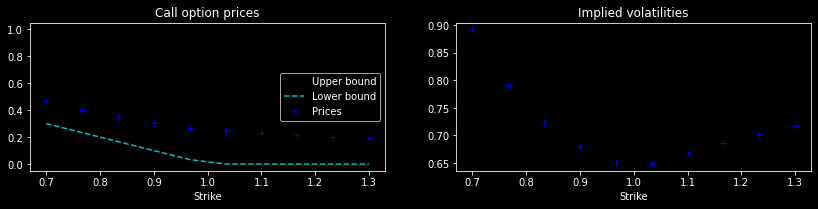

In [140]:
S, T, r, callput = 1., 1., 0., 1
nbStrikes = 10
KK = np.linspace(0.7, 1.3, nbStrikes)
prices = [0.5*np.minimum(1./(2.*K), 1)*(S+ np.maximum(S-K, 0.)) for K in KK]
ivs = [impliedVol(S, K, T, r, p) for (K,p) in zip(KK, prices)]

plt.figure(figsize=(14, 6))
plt.subplot(221)
plt.plot(KK, [S for _ in KK], 'k--', label="Upper bound")
plt.plot(KK, [np.maximum(S-K,0.) for K in KK], 'c--', label="Lower bound")
plt.plot(KK, prices, 'b+', label="Prices")
plt.legend(loc="best")
plt.xlabel("Strike")
plt.title("Call option prices")

plt.subplot(222)
plt.plot(KK, ivs, 'b+')
plt.title("Implied volatilities")
plt.xlabel("Strike")
plt.show()

Suppose now we want to be able to run the impliedVol() function for a whole range of strikes and option prices at the same time.

In [141]:
impliedVols = map(lambda K, p: impliedVol(S, K, T, r, p), KK, prices)

In [142]:
type(impliedVols)

map

In [143]:
ivs = list(impliedVols)
np.round(ivs, 2)

array([0.89, 0.79, 0.72, 0.68, 0.65, 0.65, 0.67, 0.69, 0.7 , 0.72])

In [144]:
## Note that we could have written this as a list comprehension as well:
ivs = [impliedVol(S, K, T, r, p) for (K,p) in zip(KK, prices)]

**Exercise**

Only returns the implied volatilities above a certain threshold.

In [145]:
threshold = .68

ivs_filtered = list(filter(lambda x: x>threshold, ivs))
TrueFalse = list(map(lambda x: x>threshold, ivs))
KK_filtered = [K for (i,K) in enumerate(KK) if TrueFalse[i]] ## select the corresdonding strikes

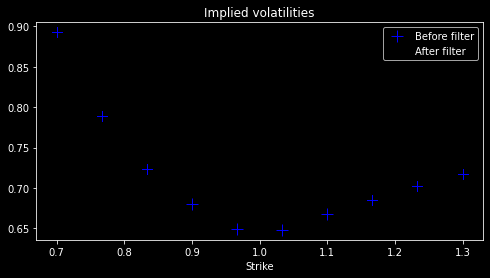

In [146]:
plt.figure(figsize=(8,4))
plt.plot(KK, ivs, 'b+', markersize=12, label="Before filter")
plt.plot(KK_filtered, ivs_filtered, 'ko', mfc='None', markersize=12, label="After filter")
plt.legend(loc="best")
plt.title("Implied volatilities")
plt.xlabel("Strike")
plt.show()

# The itertools module
The itertools module contains a number of commonly-used iterators as well as functions for combining several iterators.
We only show some basic and useful examples.

In [147]:
import itertools

In [153]:
itertools.repeat('abc', 5)

repeat('abc', 5)

In [154]:
type(itertools.repeat('abc', 5))

itertools.repeat

In [155]:
list(itertools.repeat('abc', 5))

['abc', 'abc', 'abc', 'abc', 'abc']

In [156]:
list(itertools.chain(['a', 'b', 'c'], (1, 2, 3)))

['a', 'b', 'c', 1, 2, 3]

In [157]:
## Combinatorics
comb = itertools.combinations([1, 2, 3, 4, 5], 2)
combL = list(comb)
print(combL)
print("Number of elements: ", len(combL))

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
Number of elements:  10


Note that the elements within each output tuple are in the same order as the original iterable input

In [158]:
perm = itertools.permutations([1, 2, 3, 4, 5], 2)
permL = list(perm)
print(permL)
print("Number of elements: ", len(permL))

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4)]
Number of elements:  20


`itertools.groupby`

`groupby()` collects all the consecutive elements from the underlying iterable that have the same key value, and returns a stream of 2-tuples containing a key value and an iterator for the elements with that key.

In [159]:
ukCities = [('Edinburg', 'Scotland'), ('London', 'England'), ('Cardiff', 'Wales'),
             ('Dublin', 'Ireland'), ('Belfast', 'Northern Ireland'), ('Glasgow', 'Scotland'), 
              ('Perth', 'Scotland'), ('Liverpool', 'England'), ('York', 'England'), ('Bath', 'England'), 
              ('Swansea', 'Wales'), ('Cork', 'Ireland'), ('Galway', 'Ireland'), ('Londonderry', 'Northern Ireland')]

def get_country(myList):
    return myList[1]

data = sorted(ukCities, key=lambda x: x[1])
itg = itertools.groupby(data, get_country)
for i in itg:
    print("Country: ", i[0])
    for j in i[1]:
        print(j[0])
    print("*******")

Country:  England
London
Liverpool
York
Bath
*******
Country:  Ireland
Dublin
Cork
Galway
*******
Country:  Northern Ireland
Belfast
Londonderry
*******
Country:  Scotland
Edinburg
Glasgow
Perth
*******
Country:  Wales
Cardiff
Swansea
*******


# Decorators

We have seen how to define functions on functions. We now move on, for the final part of this session,  how to modify (or  `decorate`) functions.

In [161]:
def decorate(f):
    def wrapper():
        print("***Something to do before the function is called***")
        f()
        print("***Something to do after the function is called***")
    return wrapper

def myComment():
    print("My lecturer is amazing")

print(myComment)
myComment = decorate(myComment)

<function myComment at 0x0000017066987820>


In [162]:
myComment()

***Something to do before the function is called***
My lecturer is amazing
***Something to do after the function is called***


The function `myComment` now refers to the decorator instead of the function itself, indeed:

In [163]:
myComment

<function __main__.decorate.<locals>.wrapper()>

## The `pie` syntax

How to avoid repeating the function name too many times.

In [171]:
def decorate(f):
    def wrapper():
        print("***Something to do before the function is called***")
        f()
        print("***Something to do after the function is called***")
    return wrapper

@decorate
def myComment():
    print("My lecturer is amazing")

In [173]:
myComment

<function __main__.decorate.<locals>.wrapper()>

In [174]:
myComment()

***Something to do before the function is called***
My lecturer is amazing
***Something to do after the function is called***


## Decorating functions with arguments

In [175]:
def decorate(f):
    def wrapper():
        print("***Something to do before the function is called***")
        f()
        print("***Something to do after the function is called***")
    return wrapper

@decorate
def callOptionType(S, K):
    if S<K:
        msg = "The Call option is out of the money"
    elif S>K:
        msg = "The Call option is in the money"
    else:
        msg = "The Call option is at the money"
    print(msg)
    payoff = np.maximum(S-K, 0.)
    return payoff
        
callOptionType(100, 90)

TypeError: wrapper() takes 0 positional arguments but 2 were given

In [176]:
def decorate(f):
    def wrapper(*args):
        print("***Something to do before the function is called***")
        f(*args)
        print("***Something to do after the function is called***")
    return wrapper

@decorate
def callOptionType(S, K):
    if S<K:
        msg = "The Call option is out of the money"
    elif S>K:
        msg = "The Call option is in the money"
    else:
        msg = "The Call option is at the money"
        
    print(msg)
    payoff = np.maximum(S-K, 0.)
    return payoff
        
callOptionType(100., 90.)

***Something to do before the function is called***
The Call option is in the money
***Something to do after the function is called***


Note however that the wrapper inside the decorator does not return anything. 
The decorator did not return the value of the `callOptionType` function. We need to make sure the wrapper function returns the value of the decorated function.

In [179]:
def decorate(f):
    def wrapper(*args):
        print("***Something to do before the function is called***")
        f(*args)
        print("***Something to do after the function is called***")
        return f(*args)
    return wrapper

@decorate
def callOptionType(S, K):
    if S<K:
        msg = "The Call option is out of the money"
    elif S>K:
        msg = "The Call option is in the money"
    else:
        msg = "The Call option is at the money"
        
    print(msg)
    payoff = np.maximum(S-K, 0.)
    return payoff
        
callOptionType(100, 90)

***Something to do before the function is called***
The Call option is in the money
***Something to do after the function is called***
The Call option is in the money


10.0

## Introspection?

What is `callOptionType`?

In [180]:
callOptionType

<function __main__.decorate.<locals>.wrapper(*args)>

In [181]:
callOptionType.__name__

'wrapper'

In [182]:
help(callOptionType)

Help on function wrapper in module __main__:

wrapper(*args)



In [189]:
import functools

def decorate(f):
    @functools.wraps(f)
    def wrapper(*args):
        print("***Something to do before the function is called***")
        f(*args)
        print("***Something to do after the function is called***")
        return f(*args)
    return wrapper

@decorate
def callOptionType(S, K):
    if S<K:
        msg = "The Call option is out of the money"
    elif S>K:
        msg = "The Call option is in the money"
    else:
        msg = "The Call option is at the money"
    print(msg)
    payoff = np.maximum(S-K, 0.)
    return payoff
        
callOptionType(100, 90)

***Something to do before the function is called***
The Call option is in the money
***Something to do after the function is called***
The Call option is in the money


10.0

In [190]:
callOptionType

<function __main__.callOptionType(S, K)>

In [185]:
callOptionType.__name__

'callOptionType'

In [186]:
help(callOptionType)

Help on function callOptionType in module __main__:

callOptionType(S, K)



# Conclusion

Functional Programming can be very useful, but Python is not a pure FP programming language (like Haskell). It is in fact a multi-paradigm language, and FP should be used with parsimony, not religiously.